In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
mercedes_df=pd.read_csv("MercedesBenz_Data.csv")
mercedes_copy_df=mercedes_df.copy()
mercedes_df.shape
#mercedes_df.dtypes
#mercedes_df.shape

(4209, 378)

In [3]:
y=mercedes_df['y']
mercedes_df.drop(columns='y',inplace=True)

In [4]:
mercedes_df.isnull().sum() #count of missing values for each column

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [5]:
#from dataset,identify the columns that take all unique values/all same values.Drop such columnsfrom the dataframe.
col_list=list(mercedes_df.columns)
col_to_drop=[]
for col in col_list:
    #print(col)        
    if len(mercedes_df[col].value_counts())==1 or len(mercedes_df[col].value_counts())==mercedes_df.shape[0]:
        col_to_drop.append(col)
col_to_drop
        

['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [6]:
mercedes_df.drop(columns=col_to_drop,inplace=True)


In [7]:
mercedes_df.shape

(4209, 364)

In [8]:
col_cont=[col for col in mercedes_df.columns if mercedes_df[col].dtype!='object']
col_cat=[col for col in mercedes_df.columns if mercedes_df[col].dtype=='object']
col_cont
col_cat

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [9]:
mercedes_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#no need of correlation check here.
         

In [11]:
#plt.boxplot(mercedes_df['y'])

In [12]:
#sns.boxplot(mercedes_df['y'],orient='v')


In [13]:
#sns.__version__

In [14]:
#sns.boxplot(mercedes_df['X0'],mercedes_df['y'])
#plt.title('boxplot')



In [15]:
#plt.hist(mercedes_df['y'])
#plt.title('histogram')
#plt.xlabel('y')
#plt.ylabel('count of occurences')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(mercedes_df,y,test_size=0.2,random_state=34)

In [17]:
#one-hot encoding the categorical values
oe_train=pd.get_dummies(x_train[[col for col in x_train.columns if x_train[col].dtype=='object']])
oe_test=pd.get_dummies(x_test[[col for col in x_test.columns if x_test[col].dtype=='object']])
oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1)

In [18]:
con_cols=[col for col in x_train.columns if x_train[col].dtype=='int64' or x_train[col].dtype=='float64']

In [19]:
x_train_final=pd.concat([x_train[con_cols],oe_train_final],axis=1)
x_test_final=pd.concat([x_test[con_cols],oe_test_final],axis=1)

In [20]:
#x_train_final

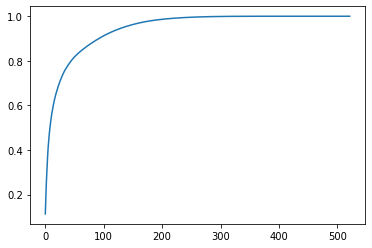

In [21]:
pca=PCA()
x_train_pca_df=pd.DataFrame(pca.fit_transform(x_train_final))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [22]:
pca.explained_variance_ratio_

array([1.12918618e-01, 7.72066139e-02, 7.45041726e-02, 5.86738461e-02,
       4.98280140e-02, 4.20144854e-02, 3.33507396e-02, 2.81635534e-02,
       2.46618809e-02, 2.12661438e-02, 2.11003400e-02, 1.71277505e-02,
       1.50394105e-02, 1.44058461e-02, 1.39196469e-02, 1.28871084e-02,
       1.18209263e-02, 1.08581683e-02, 9.98027629e-03, 9.03006337e-03,
       8.92746050e-03, 8.44733015e-03, 8.34189997e-03, 7.79123356e-03,
       7.51263896e-03, 7.20561537e-03, 7.05239455e-03, 6.48954353e-03,
       6.43181098e-03, 6.30277774e-03, 5.85871369e-03, 5.52200815e-03,
       5.29572431e-03, 4.91501103e-03, 4.74121105e-03, 4.40027249e-03,
       4.36023909e-03, 4.20695809e-03, 4.05023778e-03, 4.02746777e-03,
       3.82090532e-03, 3.74731262e-03, 3.69571006e-03, 3.58774727e-03,
       3.51655905e-03, 3.39316999e-03, 3.21700868e-03, 3.11089872e-03,
       3.02702984e-03, 2.88466037e-03, 2.78233590e-03, 2.72405784e-03,
       2.67238963e-03, 2.62601396e-03, 2.57509446e-03, 2.46139673e-03,
      

In [23]:
pca_1=PCA(n_components=150)
x_train_pca1_df=pd.DataFrame(pca_1.fit_transform(x_train_final),columns=list(range(0,150)))
x_test_pca1_df=pd.DataFrame(pca_1.transform(x_test_final))
#x_test_pca1_df

In [24]:
#proof that PCA results in zero or no multi collinearity
vif_pca=pd.DataFrame()
vif_pca['VIF Factor_PCA']=[variance_inflation_factor(x_train_pca1_df.values,i) for i in range(x_train_pca1_df.shape[1])]
vif_pca['Column Name']=x_train_pca1_df.columns

In [25]:
vif_pca

,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
...,...,...
145,1.0,145
146,1.0,146
147,1.0,147
148,1.0,148


In [26]:
#multicollinearity exists on the data without PCA
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['Column Name']=x_train_final.columns
vif

,VIF Factor,Column Name
0,inf,X10
1,inf,X12
2,inf,X13
3,inf,X14
4,inf,X15
...,...,...
517,inf,X8_u
518,inf,X8_v
519,inf,X8_w
520,inf,X8_x
